### Samarth Garg
### Roll No: 2020IMT-085
* Task: To classify Iris dataset using decision tree classifier
* Then Use PCA and meaure again the performance accuracy, f1-score, confusion matrix, precision and recall

### Preprocessing

In [27]:
import pandas as pd

df = pd.read_csv("../Lab/data/IRIS.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [28]:
from sklearn.preprocessing import StandardScaler

features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
x = df.loc[:, features].values
y = df.loc[:, ['species']].values
x = StandardScaler().fit_transform(x)
x.shape

(150, 4)

In [29]:
from sklearn.preprocessing import LabelEncoder

y = LabelEncoder().fit_transform(y)
y.shape

c:\Users\Samarth\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(150,)

In [30]:
class_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

### Decision Tree Classifier

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
tree  = DecisionTreeClassifier(criterion='entropy', max_depth=3)
print(f"Shape of X-Train {X_train.shape}, Shape of y-Train {y_train.shape}")
tree.fit(X_train, y_train)

y_pred_train = tree.predict(X_train)
y_pred = tree.predict(X_test)

print(f"Accuracy Score {accuracy_score(y_test, y_pred)}")
print(f"Accuracy for training data: {accuracy_score(y_train, y_pred_train)}")
print(f'F1-Score (Training Data): {f1_score(y_train, y_pred_train, average="macro")}')
print(f"F1-Score (Testing Data): {f1_score(y_test, y_pred, average='macro')}")
print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred))

Shape of X-Train (105, 4), Shape of y-Train (105,)
Accuracy Score 0.9555555555555556
Accuracy for training data: 0.9809523809523809
F1-Score (Training Data): 0.9804753820033957
F1-Score (Testing Data): 0.9558404558404558
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      0.94      0.97        32
           2       0.95      1.00      0.97        37

    accuracy                           0.98       105
   macro avg       0.98      0.98      0.98       105
weighted avg       0.98      0.98      0.98       105

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.94      0.94      0.94        18
           2       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



### Observations
* With max-depth of 1 accuracy is 0.6
* With max-depth of 3 accuracy is 0.95
* Conclusion : On increasing the depth upto 3 the accuracy is increasing

### Accuracy Vs Depth (Testing)

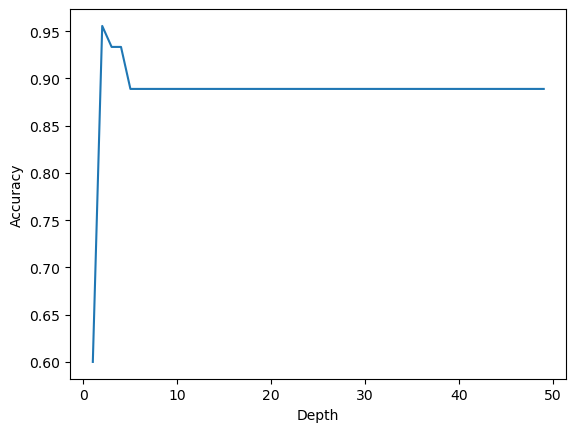

In [41]:
import matplotlib.pyplot as plt

max_depth = 50
acc = []
for i in range(1, max_depth):
    tree = DecisionTreeClassifier(criterion='entropy', max_depth=i)
    tree.fit(X_train, y_train)
    y_pred = tree.predict(X_test)
    acc.append(accuracy_score(y_test, y_pred))

plt.plot(range(1, max_depth), acc)
plt.xlabel('Depth')
plt.ylabel("Accuracy")
plt.show()

### Accuracy Vs Depth (Training)

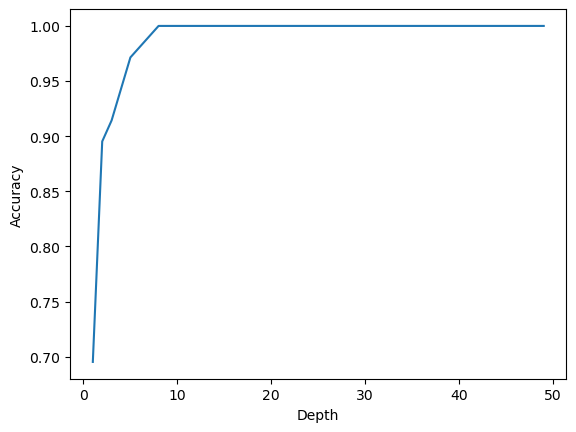

In [45]:
max_depth = 50
acc = []
for i in range(1, max_depth):
    tree = DecisionTreeClassifier(criterion='entropy', max_depth=i)
    tree.fit(X_train, y_train)
    y_pred_train = tree.predict(X_train)
    acc.append(accuracy_score(y_train, y_pred_train))

plt.plot(range(1, max_depth), acc)
plt.xlabel('Depth')
plt.ylabel("Accuracy")
plt.show()

#### Confusion Matrix

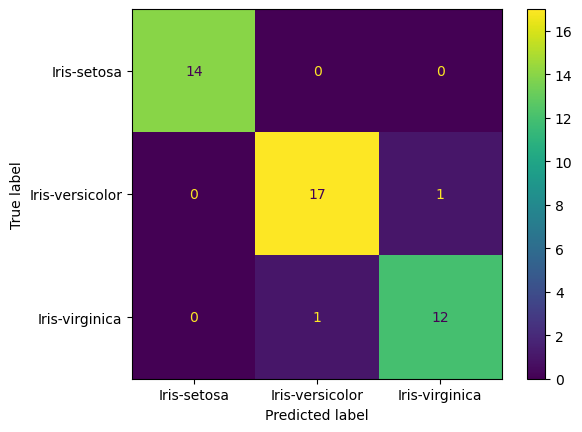

In [34]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
dist = ConfusionMatrixDisplay(cm, display_labels = class_names)
dist.plot()
plt.show()

#### Decision Tree after PCA

In [35]:
# pca for dimensionality reduction
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
x = pca.fit_transform(x)
print("Shape of x after PCA", x.shape)
print("Explained Variance Ratio", pca.explained_variance_ratio_)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
tree = DecisionTreeClassifier(criterion='entropy', max_depth = 3)
tree.fit(X_train, y_train)
y_pred_train = tree.predict(X_train)
y_pred = tree.predict(X_test)

print(f"Accuracy Score {accuracy_score(y_test, y_pred)}")
print(f"Accuracy for training data: {accuracy_score(y_train, y_pred_train)}")
print(f'F1-Score (Training Data): {f1_score(y_train, y_pred_train, average="macro")}')
print(f"F1-Score (Testing Data): {f1_score(y_test, y_pred, average='macro')}")
print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred))

Shape of x after PCA (150, 2)
Explained Variance Ratio [0.72770452 0.23030523]
Accuracy Score 0.9333333333333333
Accuracy for training data: 0.9142857142857143
F1-Score (Training Data): 0.9103313840155947
F1-Score (Testing Data): 0.9352142110762801
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.96      0.75      0.84        32
           2       0.82      0.97      0.89        37

    accuracy                           0.91       105
   macro avg       0.93      0.91      0.91       105
weighted avg       0.92      0.91      0.91       105

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.83      0.91        18
           2       0.81      1.00      0.90        13

    accuracy                           0.93        45
   macro avg       0.94      0.94      0.94        45
weighted avg       0.95      0.93      0.93 

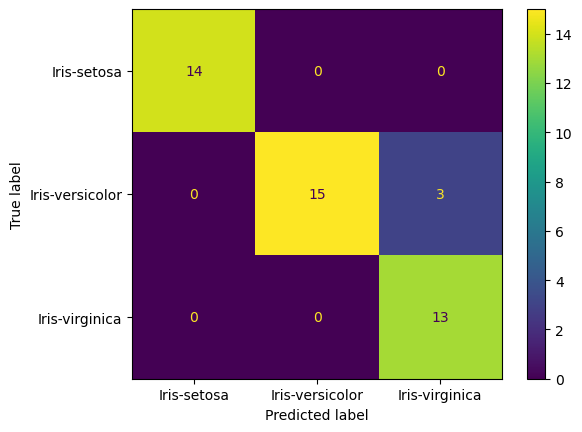

In [36]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
dist = ConfusionMatrixDisplay(cm, display_labels = class_names)
dist.plot()
plt.show()

### Plot the Tree

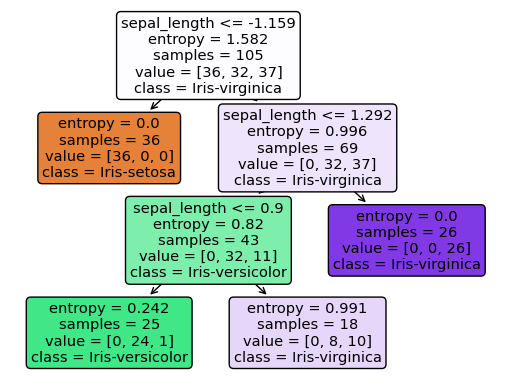

In [37]:
from sklearn.tree import plot_tree

tree = plot_tree(tree, feature_names=features, class_names=class_names, filled=True, rounded=True)


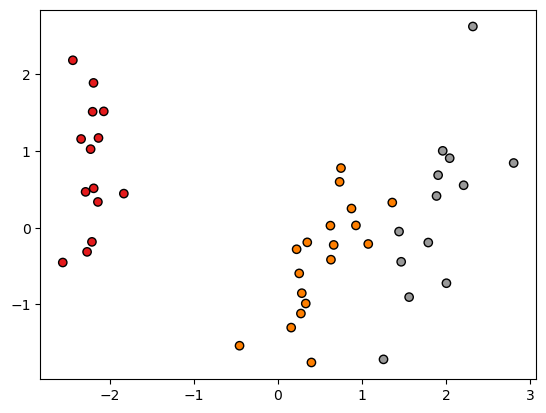

In [51]:
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.Set1, edgecolor='k')
